In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import matplotlib.pyplot as plt

2024-06-20 15:00:21.638743: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 15:00:21.644093: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 15:00:21.731184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 15:00:27.289911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading the Dataset:

The IMDB dataset is loaded with the top 10,000 most frequent words.

In [2]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Decoding Function:

A function is provided to decode reviews back to text for a better understanding of the data.


In [3]:
# Function to decode reviews back to text
word_index = datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decode_review = lambda text: ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


The reviews are preprocessed by padding the sequences to a maximum length of 500 words to ensure uniform input length.

In [4]:
# Preprocess the data
def preprocess_data(sequences, maxlen=500):
    return preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

x_train = preprocess_data(train_data)
x_test = preprocess_data(test_data)

Building the Model:

An embedding layer is used to represent the input words in a dense vector space.
A GlobalAveragePooling1D layer is used to reduce the dimensionality of the data.
Two dense layers are used, with the final layer using a sigmoid activation function for binary classification.

In [5]:
# Build the model
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=16, input_length=500))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/oscar/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compiling the Model:

The model is compiled using the Adam optimizer and binary cross-entropy loss.

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the Model:

The model is trained on the training dataset and validated on the test dataset for 10 epochs.

In [7]:
# Train the model
history = model.fit(x_train, train_labels, epochs=10, batch_size=512, validation_data=(x_test, test_labels))

Epoch 1/10


2024-06-20 15:01:19.760723: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50000000 exceeds 10% of free system memory.


 1/49 ━━━━━━━━━━━━━━━━━━━━ 2:06 3s/step - accuracy: 0.5078 - loss: 0.6932

2024-06-20 15:01:22.359442: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16384000 exceeds 10% of free system memory.
2024-06-20 15:01:22.439216: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16384000 exceeds 10% of free system memory.
2024-06-20 15:01:22.490336: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16384000 exceeds 10% of free system memory.
2024-06-20 15:01:22.547439: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16384000 exceeds 10% of free system memory.


49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.5319 - loss: 0.6923 - val_accuracy: 0.6240 - val_loss: 0.6865
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6017 - loss: 0.6828 - val_accuracy: 0.5792 - val_loss: 0.6704
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.6491 - loss: 0.6585 - val_accuracy: 0.7194 - val_loss: 0.6249
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7153 - loss: 0.6094 - val_accuracy: 0.7598 - val_loss: 0.5687
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7751 - loss: 0.5451 - val_accuracy: 0.7833 - val_loss: 0.5129
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.8176 - loss: 0.4841 - val_accuracy: 0.8260 - val_loss: 0.4616
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8404 - loss: 0.4329 - val_accuracy: 0.8268 - val_loss: 0.4278
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8531 - loss: 0.3947 - val_accuracy: 0.8516 - val_loss

Evaluating the Model:

The model's performance is evaluated on the test dataset, and the test accuracy is printed.

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

782/782 - 2s - 3ms/step - accuracy: 0.8630 - loss: 0.3591

Test accuracy: 0.8629599809646606


Plotting Results:

Training and validation accuracy and loss are plotted to visualize the model's performance over the epochs.

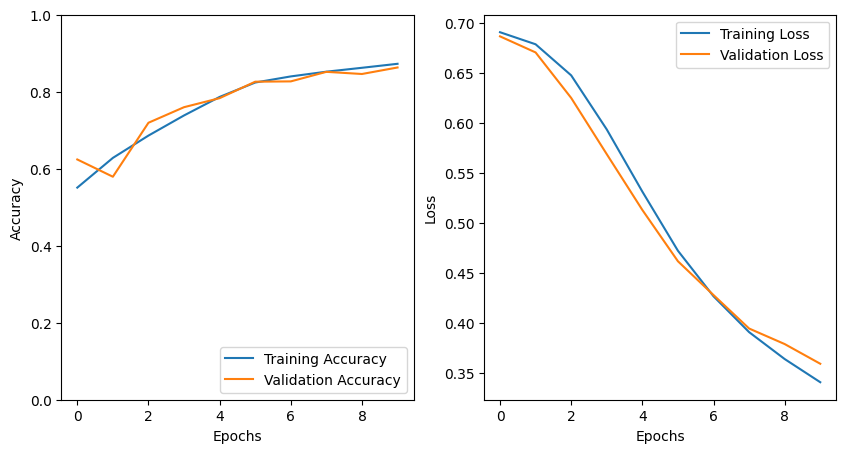

In [9]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()